<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** 

Analyse the temperature and humidity in singapore for optimising air conditioning of office buildings and shopping malls

Rainfall affects daily activities of Singapore population, hence it is worth analysing rainfall data to identify trends 

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

Singapore has more hour-to-hour variation in climate variables, but have uniformly high rainfall, temperature and humidity from month-to-month.

There is Northeast Monsoon Season from December to March and Southwest Monsoon Season from June to September every year. Inter monsoon seasons are characterised by late afternoon or early evening thunderstorms.

Singapore has plenty rainfall at 167 raindays and 2165.9mm rainfall on average per year. Usually rain the most in the afternoons during Northeast Monsoon Season from December to March.

Singapore has mean temperature of 26-28 throughout the year, with lowest in the Northeast Monsoon Season from December to March.

Reference: http://www.weather.gov.sg/climate-climate-of-singapore/

Note: 
1. Maybe can try to replicate the tables in the reference for a start
2. The results are averaged monthly over 1981 to 2010. For our analysis, we can see the change over the years instead.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:

def calculate_mean(numerical_list):
    sum = 0
    for i in numerical_list:
        sum+=i
    return sum/len(numerical_list)

calculate_mean([1,5,6,3,7,0])

3.6666666666666665

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:
def calculate_std_dev(numerical_list):
    mean = calculate_mean(numerical_list)
    sse = 0
    for i in numerical_list:
        sse += (i-mean)**2
    std_dev = (sse/len(numerical_list))**0.5  
    return std_dev

calculate_std_dev([1,5,6,3,7,0])

2.560381915956203

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [3]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob as gl

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [4]:
# loop over the list of csv files into dataframes
path = "../data/data-gov-sg/*.csv"
dfs = []

for fname in gl.glob(path):
    print(fname)
    dfs.append(pd.read_csv(fname))

../data/data-gov-sg\rainfall-monthly-highest-daily-total.csv
../data/data-gov-sg\rainfall-monthly-number-of-rain-days.csv
../data/data-gov-sg\rainfall-monthly-total.csv
../data/data-gov-sg\relative-humidity-monthly-mean.csv
../data/data-gov-sg\sunshine-duration-monthly-mean-daily-duration.csv
../data/data-gov-sg\surface-air-temperature-annual-mean-daily-minimum.csv
../data/data-gov-sg\surface-air-temperature-monthly-mean-daily-minimum.csv
../data/data-gov-sg\wet-bulb-temperature-hourly.csv


In [5]:
# 1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
for i in dfs:
    print(i.head(5))

     month  maximum_rainfall_in_a_day
0  1982-01                       36.5
1  1982-02                        9.4
2  1982-03                       61.7
3  1982-04                       45.1
4  1982-05                       33.0
     month  no_of_rainy_days
0  1982-01                10
1  1982-02                 5
2  1982-03                11
3  1982-04                14
4  1982-05                10
     month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2
     month  mean_rh
0  1982-01     81.2
1  1982-02     79.5
2  1982-03     82.3
3  1982-04     85.9
4  1982-05     83.2
     month  mean_sunshine_hrs
0  1982-01                5.6
1  1982-02                7.6
2  1982-03                5.1
3  1982-04                4.7
4  1982-05                5.8
   year  tem_mean_daily_min
0  1982                24.6
1  1983                24.8
2  1984                24.0
3  1985                2

In [6]:
# 2. Check for missing values and datatype.
for i in dfs:
    print(dict(i.isna().sum()))

{'month': 0, 'maximum_rainfall_in_a_day': 0}
{'month': 0, 'no_of_rainy_days': 0}
{'month': 0, 'total_rainfall': 0}
{'month': 0, 'mean_rh': 0}
{'month': 0, 'mean_sunshine_hrs': 0}
{'year': 0, 'tem_mean_daily_min': 0}
{'month': 0, 'temp_mean_daily_min': 0}
{'wbt_date': 0, 'wbt_time': 0, 'wet_bulb_temperature': 0}


In [7]:
# 3. Check for any obvious issues with the observations.
for i in dfs:
    print(f"{dict(i.dtypes)}")

{'month': dtype('O'), 'maximum_rainfall_in_a_day': dtype('float64')}
{'month': dtype('O'), 'no_of_rainy_days': dtype('int64')}
{'month': dtype('O'), 'total_rainfall': dtype('float64')}
{'month': dtype('O'), 'mean_rh': dtype('float64')}
{'month': dtype('O'), 'mean_sunshine_hrs': dtype('float64')}
{'year': dtype('int64'), 'tem_mean_daily_min': dtype('float64')}
{'month': dtype('O'), 'temp_mean_daily_min': dtype('float64')}
{'wbt_date': dtype('O'), 'wbt_time': dtype('int64'), 'wet_bulb_temperature': dtype('float64')}


In [8]:
# 4. Fix any errors you identified in steps 2-3.
for i in dfs:
    if 'month' in list(i.columns):
        print(f"Columns: {list(i.columns)}, Shape: {i.shape}, from {i['month'].min()} to {i['month'].max()}")

Columns: ['month', 'maximum_rainfall_in_a_day'], Shape: (491, 2), from 1982-01 to 2022-11
Columns: ['month', 'no_of_rainy_days'], Shape: (491, 2), from 1982-01 to 2022-11
Columns: ['month', 'total_rainfall'], Shape: (491, 2), from 1982-01 to 2022-11
Columns: ['month', 'mean_rh'], Shape: (491, 2), from 1982-01 to 2022-11
Columns: ['month', 'mean_sunshine_hrs'], Shape: (491, 2), from 1982-01 to 2022-11
Columns: ['month', 'temp_mean_daily_min'], Shape: (491, 2), from 1982-01 to 2022-11


In [9]:
#Fix any incorrect data types found in step 5.
# 5A. Fix any individual values preventing other columns from being the appropriate type.
for df in dfs:
    if 'month' in list(df.columns):
        df['month']=pd.to_datetime(df['month'])
    elif 'wbt_date' in list(df.columns):
        df['wbt_date']=pd.to_datetime(df['wbt_date'])
for i in dfs:
    print(f"{dict(i.dtypes)}")

{'month': dtype('<M8[ns]'), 'maximum_rainfall_in_a_day': dtype('float64')}
{'month': dtype('<M8[ns]'), 'no_of_rainy_days': dtype('int64')}
{'month': dtype('<M8[ns]'), 'total_rainfall': dtype('float64')}
{'month': dtype('<M8[ns]'), 'mean_rh': dtype('float64')}
{'month': dtype('<M8[ns]'), 'mean_sunshine_hrs': dtype('float64')}
{'year': dtype('int64'), 'tem_mean_daily_min': dtype('float64')}
{'month': dtype('<M8[ns]'), 'temp_mean_daily_min': dtype('float64')}
{'wbt_date': dtype('<M8[ns]'), 'wbt_time': dtype('int64'), 'wet_bulb_temperature': dtype('float64')}


In [10]:
# 5B. If the month column data is better analyzed as month and year, create new columns for the same
for df in dfs:
    if 'month' in list(df.columns):
        df['year']=df['month'].dt.year
        df['month']=df['month'].dt.month

for df in dfs:
    print(df.head(2))

   month  maximum_rainfall_in_a_day  year
0      1                       36.5  1982
1      2                        9.4  1982
   month  no_of_rainy_days  year
0      1                10  1982
1      2                 5  1982
   month  total_rainfall  year
0      1           107.1  1982
1      2            27.8  1982
   month  mean_rh  year
0      1     81.2  1982
1      2     79.5  1982
   month  mean_sunshine_hrs  year
0      1                5.6  1982
1      2                7.6  1982
   year  tem_mean_daily_min
0  1982                24.6
1  1983                24.8
   month  temp_mean_daily_min  year
0      1                 23.3  1982
1      2                 23.9  1982
    wbt_date  wbt_time  wet_bulb_temperature
0 1982-01-01         1                  24.7
1 1982-01-01         2                  24.5


In [11]:
# 6. Rename Columns.
# Column names should be all lowercase.
# Column names should not contain spaces (underscores will suffice--this allows for using the df.column_name method to access columns in addition to df['column_name']).
# Column names should be unique and informative.
#for df in dfs:
#    df.rename(columns={})

In [12]:
# 7. Drop unnecessary rows (if needed).

In [13]:
# 8. Merge dataframes that can be merged. 
# Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
result = dfs[0]
for df in dfs[1:]:
    if 'month' in list(df.columns):
        result = result.merge(df, on = ['month','year'], how='inner')

result.head(5)

,month,maximum_rainfall_in_a_day,year,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,temp_mean_daily_min
0,1,36.5,1982,10,107.1,81.2,5.6,23.3
1,2,9.4,1982,5,27.8,79.5,7.6,23.9
2,3,61.7,1982,11,160.8,82.3,5.1,24.3
3,4,45.1,1982,14,157.0,85.9,4.7,24.3
4,5,33.0,1982,10,102.2,83.2,5.8,25.2


In [14]:
# 9. Perform any additional cleaning that you feel is necessary.
result = result[['year','month','maximum_rainfall_in_a_day','no_of_rainy_days','total_rainfall','mean_rh','mean_sunshine_hrs','temp_mean_daily_min']]
result.head()

,year,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,temp_mean_daily_min
0,1982,1,36.5,10,107.1,81.2,5.6,23.3
1,1982,2,9.4,5,27.8,79.5,7.6,23.9
2,1982,3,61.7,11,160.8,82.3,5.1,24.3
3,1982,4,45.1,14,157.0,85.9,4.7,24.3
4,1982,5,33.0,10,102.2,83.2,5.8,25.2


In [15]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 490
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       491 non-null    int64  
 1   month                      491 non-null    int64  
 2   maximum_rainfall_in_a_day  491 non-null    float64
 3   no_of_rainy_days           491 non-null    int64  
 4   total_rainfall             491 non-null    float64
 5   mean_rh                    491 non-null    float64
 6   mean_sunshine_hrs          491 non-null    float64
 7   temp_mean_daily_min        491 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 34.5 KB


In [16]:
# 10. Save your cleaned and merged dataframes as csv files.
file_name = '../data/result.csv'
result.to_csv(file_name, encoding='utf-8', index=False)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

In [17]:
for i in list(result.columns):
    print(f"|{i}|{result[i].dtypes}|1982-2022 climate data|-|")

|year|int64|1982-2022 climate data|-|
|month|int64|1982-2022 climate data|-|
|maximum_rainfall_in_a_day|float64|1982-2022 climate data|-|
|no_of_rainy_days|int64|1982-2022 climate data|-|
|total_rainfall|float64|1982-2022 climate data|-|
|mean_rh|float64|1982-2022 climate data|-|
|mean_sunshine_hrs|float64|1982-2022 climate data|-|
|temp_mean_daily_min|float64|1982-2022 climate data|-|


**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|n_year|int64|1982-2022 climate data|Year|
|n_month|int64|1982-2022 climate data|Month|
|maximum_rainfall_in_a_day|float64|1982-2022 climate data|Highest Daily Rainfall in the Month in millimeters|
|no_of_rainy_days|int64|1982-2022 climate data|Number of rainy days per month|
|total_rainfall|float64|1982-2022 climate data|Total rainfall per month in millimeters |
|mean_rh|float64|1982-2022 climate data|The monthly mean relative humidity recorded at the Changi Climate Station.|
|mean_sunshine_hrs|float64|1982-2022 climate data|The monthly mean sunshine hours in a day recorded at the Changi Climate Station.|
|temp_mean_daily_min|float64|1982-2022 climate data|The monthly mean daily minimum temperature recorded at the Changi Climate Station.|


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [18]:
#1. Summary statistics:
result.describe()

,year,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,temp_mean_daily_min
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,2001.959267,6.488798,52.277189,14.112016,177.537067,82.224644,5.676171,24.918941
std,11.821736,3.450137,35.647758,4.995680,113.856895,3.417366,1.212024,0.733504
min,1982.000000,1.000000,0.200000,1.000000,0.200000,72.000000,2.700000,22.900000
25%,1992.000000,3.500000,30.800000,11.000000,94.100000,79.900000,4.800000,24.400000
50%,2002.000000,6.000000,43.800000,14.000000,159.500000,82.600000,5.600000,24.900000
75%,2012.000000,9.000000,62.850000,18.000000,238.950000,84.650000,6.450000,25.400000
max,2022.000000,12.000000,216.200000,27.000000,765.900000,90.700000,9.300000,27.100000


In [19]:
#Use a dictionary comprehension to apply the standard deviation function you create in part 1 to each numeric column in the dataframe. No loops.
#Assign the output to variable sd as a dictionary where:
#Each column name is now a key
#That standard deviation of the column is the value
#Example Output : {'rainfall-monthly-total': xxx, 'no_of_ra iny_days': xxx, ...}
keys = list(result.columns)
{k:round(calculate_std_dev(result[k]),3) for k in keys}

{'year': 11.81,
 'month': 3.447,
 'maximum_rainfall_in_a_day': 35.611,
 'no_of_rainy_days': 4.991,
 'total_rainfall': 113.741,
 'mean_rh': 3.414,
 'mean_sunshine_hrs': 1.211,
 'temp_mean_daily_min': 0.733}

In [20]:
#3 Using sorting and/or masking (along with the .head() method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
import calendar
def mth(month):
    return list(calendar.month_name)[month]

def high_low_check(col,years):
    for year in years:
        highest = result.loc[result[result['year']==year][col].idxmax()]
        lowest = result.loc[result[result['year']==year][col].idxmin()]
        print(f"In {year}, {mth(int(lowest['month']))} has lowest [{col}] at {round(lowest[col],1)}, and {mth(int(highest['month']))} has highest [{col}] at {round(highest[col],1)}")

In [21]:
#Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
result = result.reset_index(drop=True)
col = 'total_rainfall'
years = [1990,2000,2010,2020]
high_low_check(col,years)

In 1990, February has lowest [total_rainfall] at 24.1, and September has highest [total_rainfall] at 204.5
In 2000, September has lowest [total_rainfall] at 81.1, and November has highest [total_rainfall] at 385.7
In 2010, February has lowest [total_rainfall] at 6.3, and July has highest [total_rainfall] at 298.5
In 2020, February has lowest [total_rainfall] at 65.0, and May has highest [total_rainfall] at 255.6


In [22]:
#Which year have the highest and lowest total rainfall in the date range of analysis?
agg = result.groupby(['year'], as_index = False)['total_rainfall'].sum().sort_values(ascending=False,by = 'total_rainfall')
print(f"Year {int(agg.iloc[0]['year'])} has the highest total rainfall of {agg.iloc[0]['total_rainfall']} mm")
print(f"Year {int(agg.iloc[-1]['year'])} has the lowest total rainfall of {agg.iloc[-1]['total_rainfall']} mm")

Year 2007 has the highest total rainfall of 2886.2 mm
Year 1997 has the lowest total rainfall of 1118.9 mm


In [23]:
#Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
col = 'no_of_rainy_days'
years = [1990,2000,2010,2020]
high_low_check(col,years)

In 1990, March has lowest [no_of_rainy_days] at 4.0, and September has highest [no_of_rainy_days] at 17.0
In 2000, May has lowest [no_of_rainy_days] at 10.0, and November has highest [no_of_rainy_days] at 21.0
In 2010, February has lowest [no_of_rainy_days] at 4.0, and November has highest [no_of_rainy_days] at 21.0
In 2020, January has lowest [no_of_rainy_days] at 6.0, and July has highest [no_of_rainy_days] at 22.0


In [24]:
#Which year have the highest and lowest number of rainy days in the date range of analysis?
agg = result.groupby(['year'], as_index = False)['no_of_rainy_days'].sum().sort_values(ascending=False,by = 'no_of_rainy_days')
print(f"Year {int(agg.iloc[0]['year'])} has the highest total rainy days of {agg.iloc[0]['no_of_rainy_days']} days")
print(f"Year {int(agg.iloc[-1]['year'])} has the lowest total rainy days of {agg.iloc[-1]['no_of_rainy_days']} days")

Year 2013 has the highest total rainy days of 206 days
Year 1997 has the lowest total rainy days of 116 days


In [25]:
#Are there any outliers months in the dataset?
def find_outliers(df,col):
    q1, q3= np.percentile(df[col],[25,75])
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = [x for x in df[col] if x<lower_bound or x>upper_bound]
    return outliers

find_outliers(result,'total_rainfall')


[494.1,
 470.4,
 568.6,
 508.4,
 492.3,
 474.3,
 502.7,
 463.4,
 609.0,
 600.9,
 765.9,
 468.6,
 513.2,
 692.8]

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


In [26]:
#features:
features = ['maximum_rainfall_in_a_day', 'no_of_rainy_days','total_rainfall', 'mean_rh', 'mean_sunshine_hrs','temp_mean_daily_min']

<AxesSubplot:>

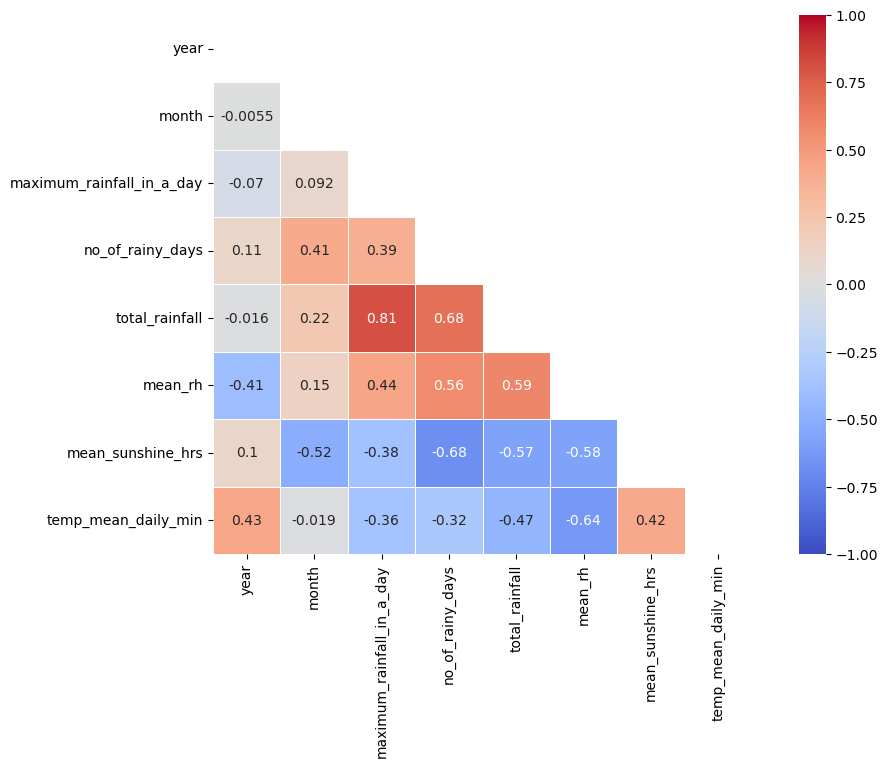

In [27]:
# 1 Use Seaborn's heatmap with pandas .corr() to visualize correlations between all numeric features.
corr = result.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (12,7))
sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap = "coolwarm")

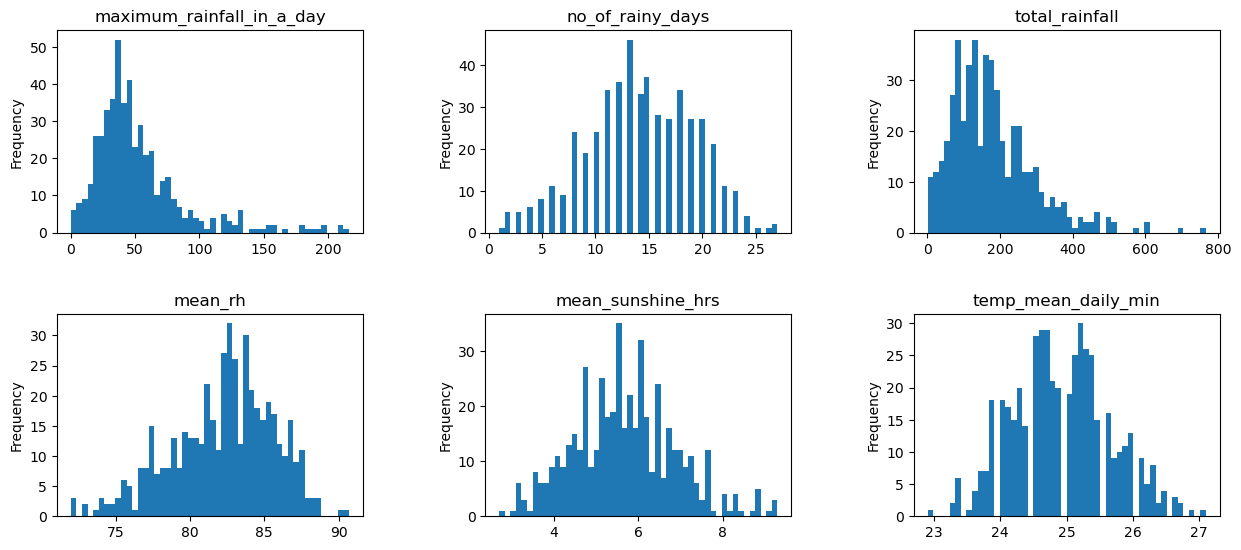

In [28]:
# 2b Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots
fig1 = plt.figure(figsize=(15,10))
fig1.subplots_adjust(hspace=0.4,wspace=0.4)

for idx, d in enumerate(features):
    fig1.add_subplot(3,3,idx+1)
    result[d].plot(kind='hist',bins=50,title=d)

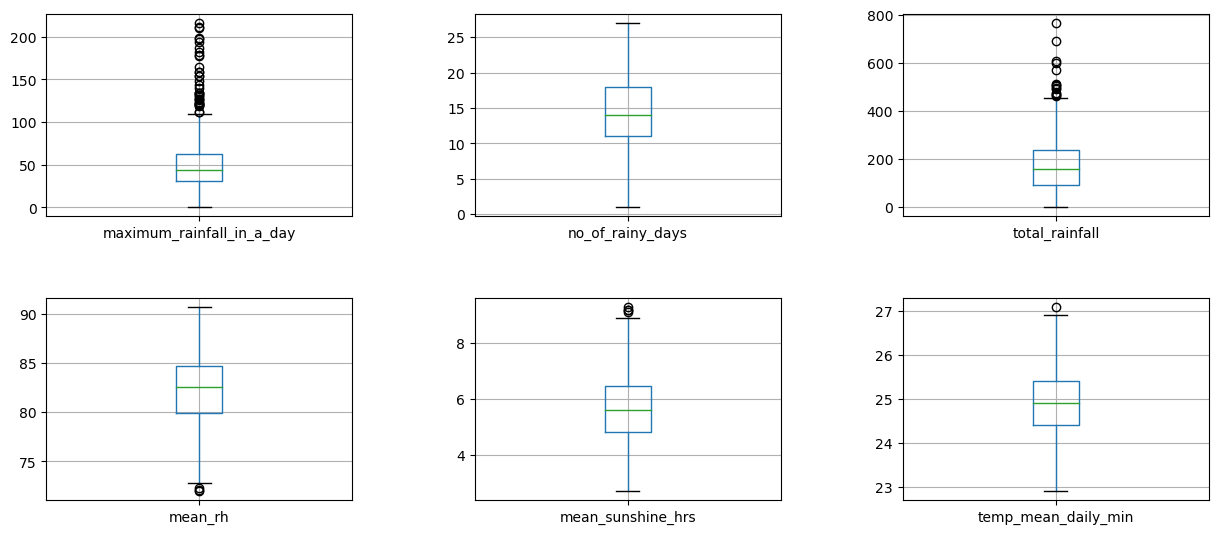

In [29]:
# Plot and interpret boxplots
fig2 = plt.figure(figsize=(15,10))
fig2.subplots_adjust(hspace=0.4,wspace=0.4)

for idx, d in enumerate(features):
    fig2.add_subplot(3,3,idx+1)
    result.boxplot([d])

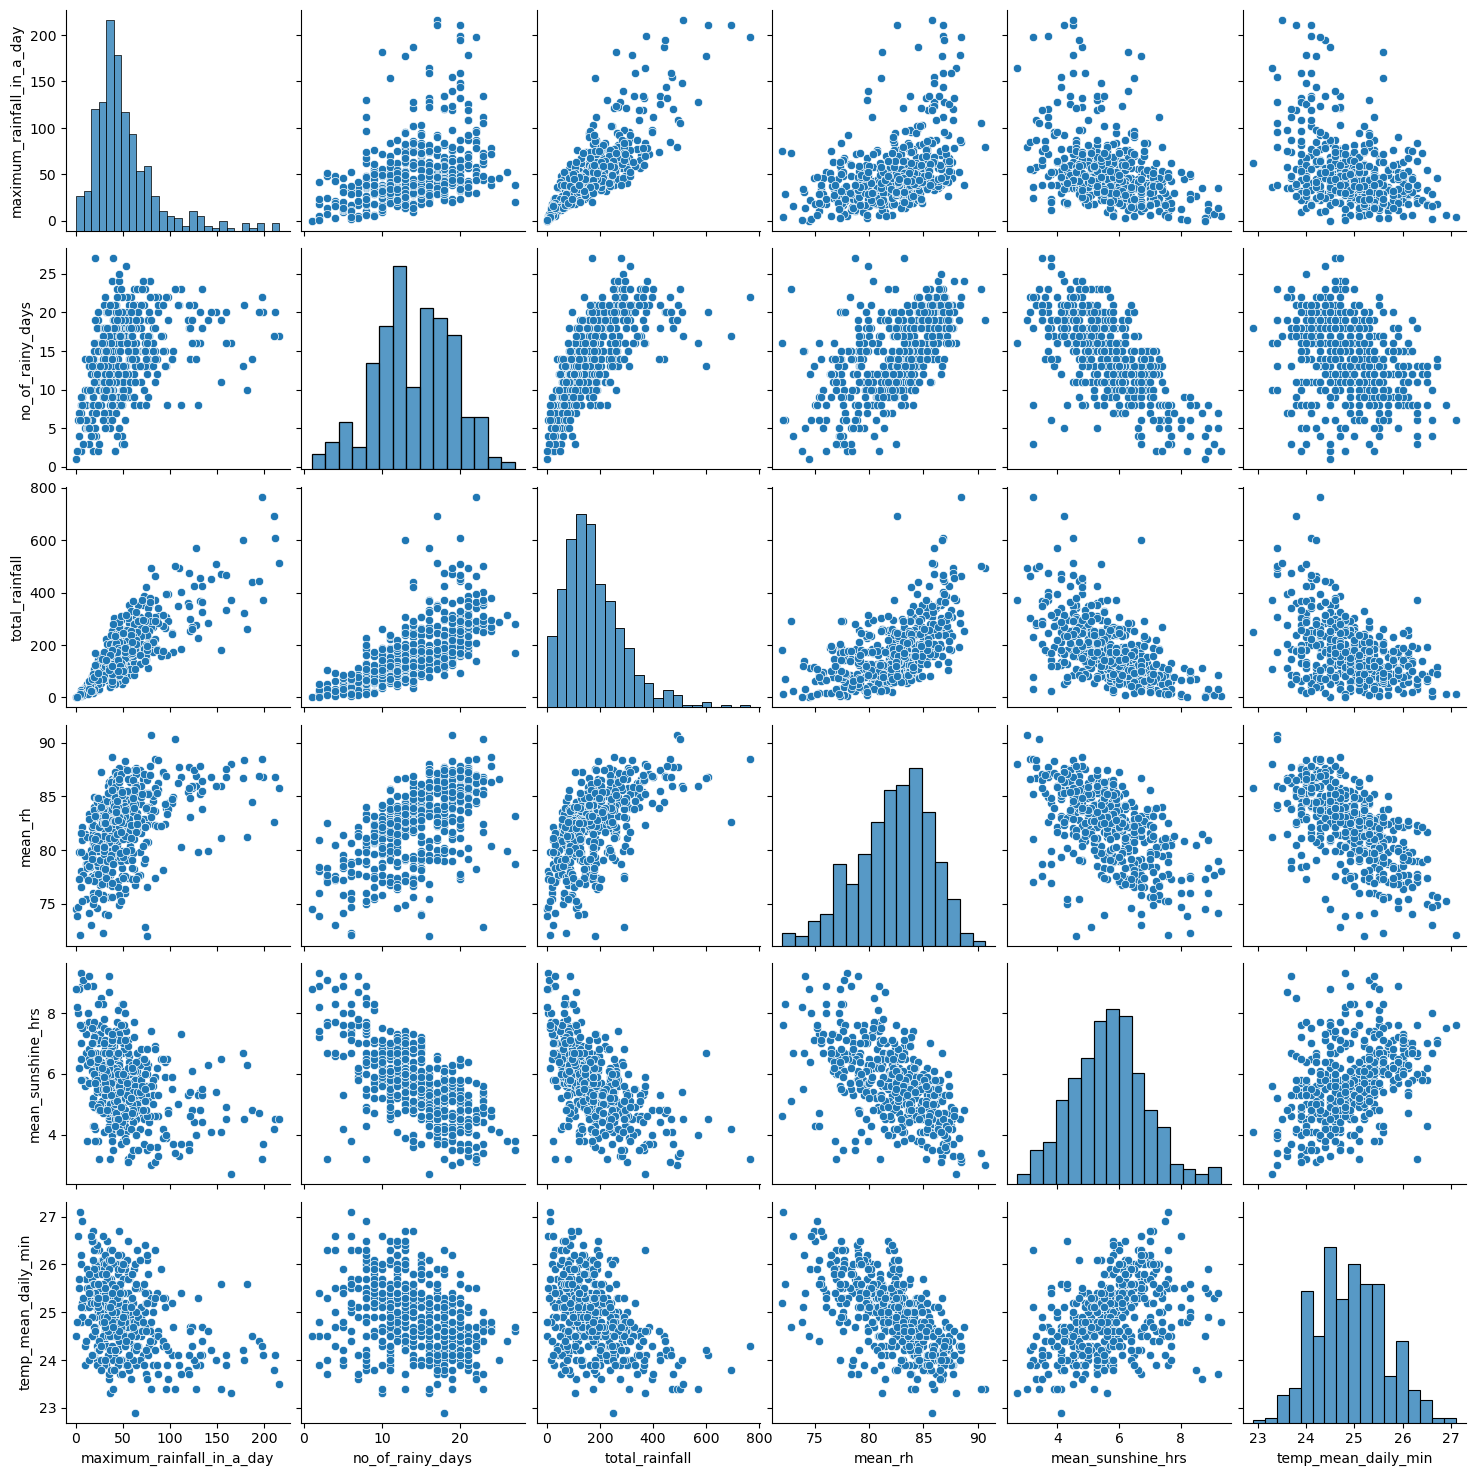

In [30]:
# Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
sns.pairplot(result[features])

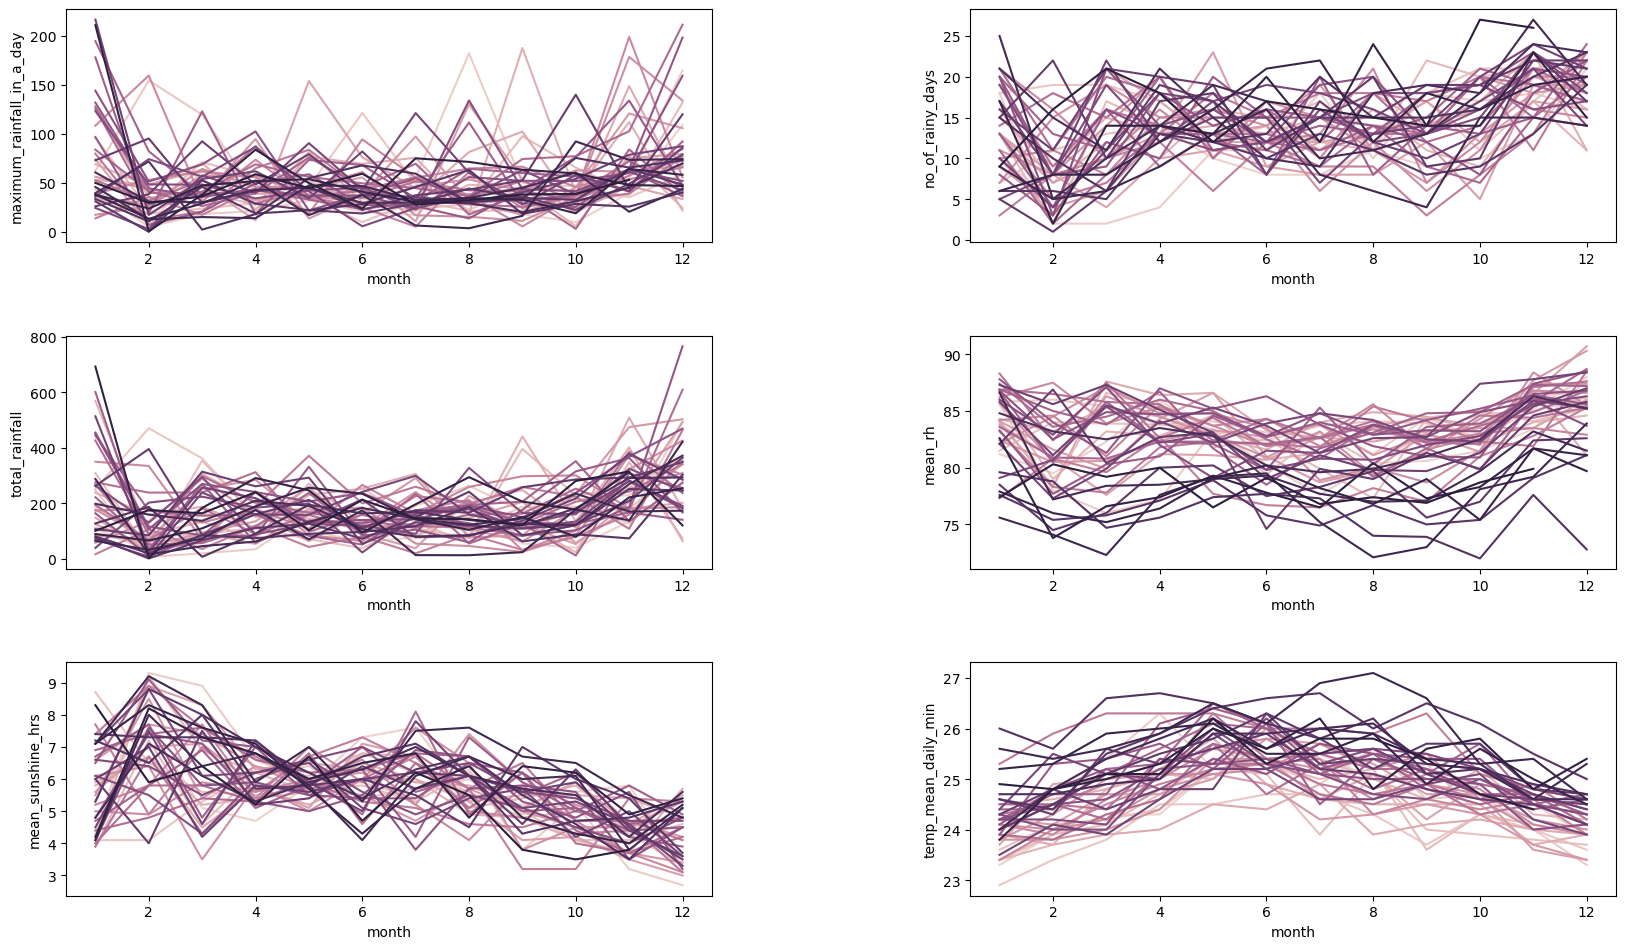

In [31]:
fig3 = plt.figure(figsize=(20,20))
fig3.subplots_adjust(hspace=0.4,wspace=0.4)

for idx, d in enumerate(features):
    fig3.add_subplot(5,2,idx+1)
    sns.lineplot(data=result.groupby(['year','month']).mean().reset_index(), x="month", y=d, hue="year",legend=None)

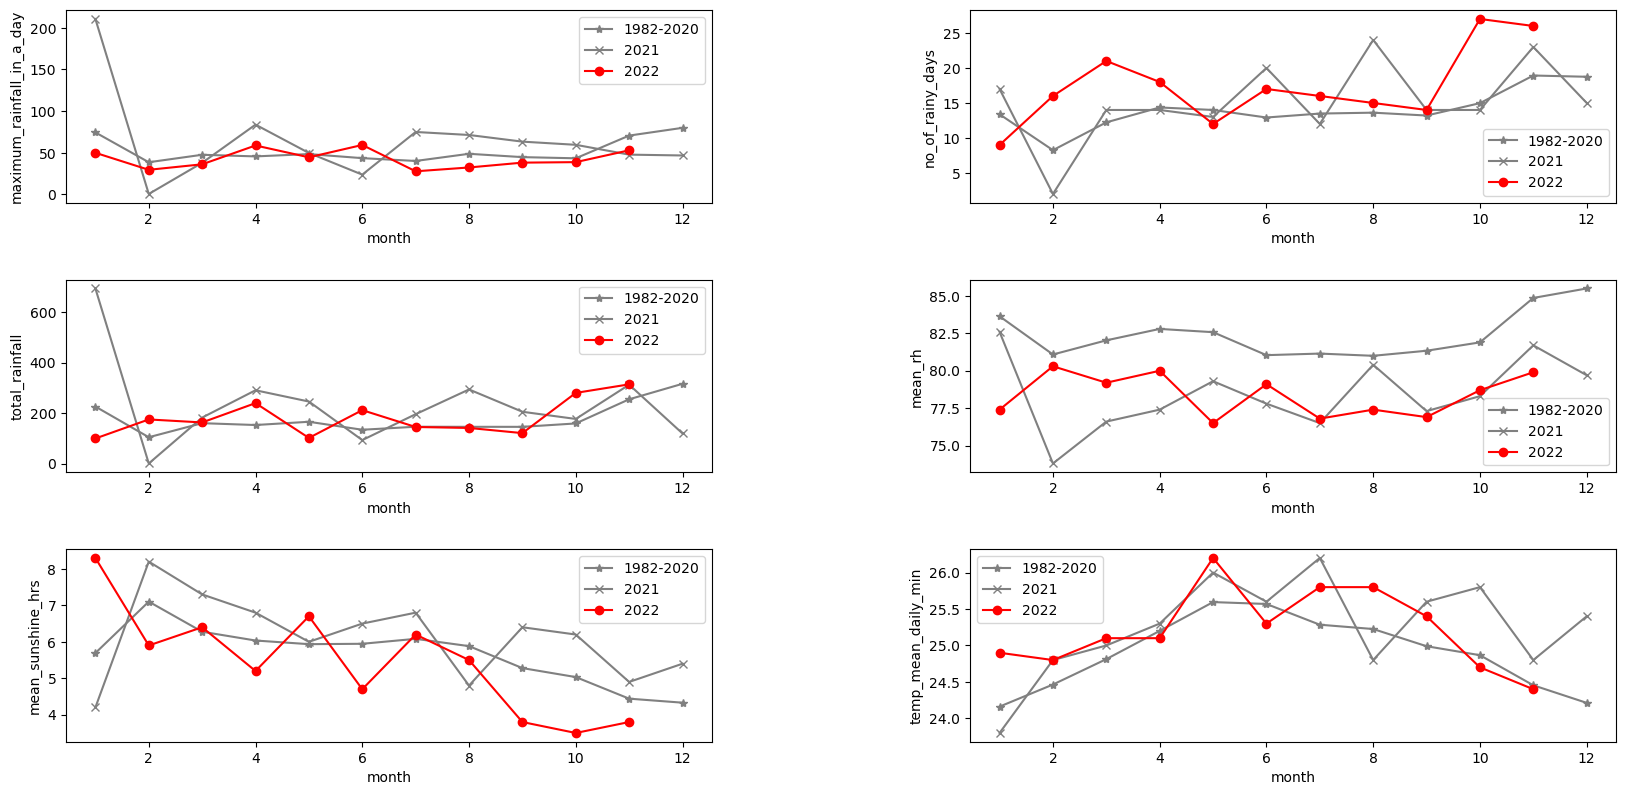

In [32]:
fig3b = plt.figure(figsize=(20,20))
fig3b.subplots_adjust(hspace=0.4,wspace=0.4)

for idx, d in enumerate(features):
    fig3b.add_subplot(6,2,idx+1)
    data = result.groupby(['year','month']).mean().reset_index()
    data_before = data[data['year']<=2020].groupby(['month']).mean().reset_index()
    data_2021 = data[data['year']==2021].groupby(['month']).mean().reset_index()
    data_2022 = data[data['year']==2022].groupby(['month']).mean().reset_index()
    plt.plot(data_before['month'], data_before[d],'-*', label ='1982-2020',color='grey')
    plt.plot(data_2021['month'], data_2021[d],'-x',label ='2021',color='grey')
    plt.plot(data_2022['month'], data_2022[d],'-o',label ='2022',color='red')
    plt.xlabel("month")
    plt.ylabel(d)
    plt.legend()

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!